# Predicting gold amount recovered from gold ore

## Introduction

In this project, we need to build a model that will predict the amount of gold recovered from gold ore. The model will help to optimize the production and eliminate unprofitable parameters.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sidetable as stb

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from numpy.random import RandomState
from sklearn.impute import KNNImputer

from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

## 1. Prepare the data

**1.1 Open the files and look into the data.**

In [2]:
gold_train = pd.read_csv('gold_recovery_train.csv')
gold_test = pd.read_csv('gold_recovery_test.csv')
gold_full = pd.read_csv('gold_recovery_full.csv')

In [3]:
gold_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
gold_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [5]:
gold_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


It seems that we have less features in the train dataset - 34 features to be accurate. We will check it later on in our analysis.

**1.2 Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.**

To answer this question we will build a function that will calculate the recovery metric with the formula that was provided in the project description.

In [6]:
def recovery (data, C, F, T):
    rec = ((data[C]*(data[F] - data[T])) / (data[F]*(data[C] - data[T])))*100
    return rec

Now let's find the MAE between the function calculations and the actual values of the features in the training dataset. Also, we need to make sure to take the values of the features that their rougher target is not NAN.

In [7]:
# Calculating the recuvery using the recovery function for rows that don't have NAN in 'rougher.output.recovery'
rec_predicted = recovery(gold_train.dropna(subset = ['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')

# Setting the actual values of recovery for rows that don't have NAN in 'rougher.output.recovery'  
rec_values = gold_train['rougher.output.recovery'].dropna().to_list()

# Printing the MAE metric between the calculation and the actual values
print('Mean Absolute Error (MAE):', mean_absolute_error(rec_values, rec_predicted))

Mean Absolute Error (MAE): 9.303415616264301e-15


Great!

We got a very small MAE value, which is exactly what we wanted. The smallest the MAE, the more accurate the predictions are to the actual values. So in our case, the difference between the predicted recovery (that we calculated) to the actual values in the dataset is insignificant and negligible. **We can certainly say that the recovery value is calculated correctly**.

**1.3 Analyze the features not available in the test set. What are these parameters? What is their type?**

In this section, we check which features are missing in the test dataset. In other words, we will check what features are in the full dataset (gold_full) but aren't in the test dataset (gold_test). We will use list comprehension technique for this task.

In [8]:
# Using list comprehension technique to generate a list of columns that is in gold_full but aren't in gold_test
not_in_gold_test = [x for x in gold_full.columns if x not in gold_test.columns]
not_in_gold_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

The list above tells us that the columns that don't include in the test dataset depend on the output of the floatation and cleaning process. These columns are not included in the test dataset, because their values would not be known prior to the purification process. Including such features will lead to information leakage, so we will remove them in the next phases of our analysis.

Another point that needed to be accounted is that there are columns that do need to be included in the test dataset: **'final.output.recovery' and 'rougher.output.recovery'** - which are our 2 target columns. Without their presence in the test dataset, we won't be able to test our model accuracy and performance. So we will merge these variables from the full dataset (gold_full) into the test dataset on the common column **'date'**, in order to test our models in later phases of our analysis.

In [9]:
# Merge target values from full_gold into test_gold
gold_test = pd.merge(gold_test, gold_full[['date', 'final.output.recovery', 'rougher.output.recovery']],
                    on = 'date', how = 'left')

In previous stages, we found that we have features that are in the training dataset but not in the test dataset and vice versa. So to maintain consistency, in the next step we will drop features in 2 steps:
1. Features that are in the training dataset but not in the test dataset.
2. Features that are in the test dataset but not in the training dataset.

In [10]:
# Droping features that are in gold_train but not in gold_test
gold_train = gold_train.drop(columns = [x for x in gold_train.columns if x not in gold_test.columns], axis = 1)

# Droping features that are in gold_test but not in gold_train
gold_test = gold_test.drop(columns = [x for x in gold_test.columns if x not in gold_train.columns], axis = 1)

At this part of the project, we found out which features weren't included in the test dataset. These features aren't included in the test dataset because they depend on the purification process and could not have been known previously. 

Also, we merged our 2 target columns that were missing in the test dataset, from the full dataset into the test dataset; and we also dropped all the features that were in the training dataset but not in the test dataset and vice-versa.  

**1.4 Perform data preprocessing.**

Let's examine the data using the **info()** method.

In [11]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   final.output.recovery                       15339 non-null  float64
 2   primary_cleaner.input.sulfate               15553 non-null  float64
 3   primary_cleaner.input.depressant            15598 non-null  float64
 4   primary_cleaner.input.feed_size             16860 non-null  float64
 5   primary_cleaner.input.xanthate              15875 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 10  primary_cl

In [12]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

The info() method tells us 3 main things:
1. We have the same number of features in the 2 datasets: 55 features.
2. We have missing values in both datasets that we will calculate their percentage later on.
3. We have one column that is an 'object' type - **date** column. Since this column represents time and date which is not important for our analysis we will drop it in a later phase of our analysis. All the other features are of 'float' type, and therefore don't need to go encoding.

**Duplicates**

In [13]:
train_duplicates = gold_train.duplicated().sum()
test_duplicates = gold_test.duplicated().sum()
print('Duplicated in the train dataset:', train_duplicates)
print('Duplicated in the test dataset:', test_duplicates)

Duplicated in the train dataset: 0
Duplicated in the test dataset: 0


Great!

No duplicates!

**Missing Values**

In [14]:
gold_train.stb.missing(style = True)

,missing,total,percent
rougher.output.recovery,"2,573","16,860",15.26%
rougher.input.floatbank11_xanthate,"1,904","16,860",11.29%
final.output.recovery,"1,521","16,860",9.02%
primary_cleaner.input.sulfate,"1,307","16,860",7.75%
primary_cleaner.input.depressant,"1,262","16,860",7.49%
rougher.input.floatbank10_sulfate,"1,044","16,860",6.19%
primary_cleaner.input.xanthate,985,"16,860",5.84%
rougher.input.floatbank11_sulfate,623,"16,860",3.70%
rougher.state.floatbank10_e_air,603,"16,860",3.58%
rougher.input.feed_rate,513,"16,860",3.04%


In [15]:
gold_test.stb.missing(style = True)

,missing,total,percent
rougher.output.recovery,546,"5,856",9.32%
final.output.recovery,442,"5,856",7.55%
rougher.input.floatbank11_xanthate,353,"5,856",6.03%
primary_cleaner.input.sulfate,302,"5,856",5.16%
primary_cleaner.input.depressant,284,"5,856",4.85%
rougher.input.floatbank10_sulfate,257,"5,856",4.39%
primary_cleaner.input.xanthate,166,"5,856",2.83%
rougher.input.floatbank10_xanthate,123,"5,856",2.10%
rougher.input.feed_sol,67,"5,856",1.14%
rougher.input.floatbank11_sulfate,55,"5,856",0.94%


We see that have a lot of missing values in a quite large number of features in both datasets. Let's calculate the percentage of all missing values of all the features from the entire datasets.

In [16]:
num_train_missing = gold_train.isnull().any(axis = 1).sum()
num_test_missing = gold_test.isnull().any(axis = 1).sum()

print('Missing values percentage in the train dataset: {:.2%}'.format(num_train_missing / len(gold_train)))
print('Missing values percentage in the test dataset: {:.2%}'.format(num_test_missing / len(gold_test)))

Missing values percentage in the train dataset: 24.80%
Missing values percentage in the test dataset: 10.71%


As we suspected earlier, indeed the percentage of the missing values is quite significant. Due to the large number of missing values, we can't just drop them, so we will fill them in. There are several approaches to filling missing values. One method is to fill the missing values with aggregation of other features, but we will not choose this path because there are many features, and a feature value can be intimately tied to other features in a way that we cannot manually replicate in a reliable way. 

We choose in this case to use the **K-Nearest Neighbor** method that takes the row of the missing value, searches for a row with the same values, or the closest values, and then fills the missing value according to this row. 

To implement the **K-Nearest Neighbor** method, we need to scale the values, as **KNN** is a distance-based algorithm that is affected by the scale of the variables. So in order to make sure that all the features have the same weight, we will scale the data.

**Scaling the data**

In [17]:
# Setting a MinMaxScaler instance.
scaler = MinMaxScaler()

# Creating list of features to scale and not to scale
scale_col = [x for x in gold_train.columns if x  not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
not_scale_col = ['date', 'rougher.output.recovery', 'final.output.recovery']

# Scaling the relevant features in the train and test datasets
gold_train_scaled = pd.DataFrame(scaler.fit_transform(gold_train[scale_col].copy()), columns = scale_col)
gold_test_scaled =  pd.DataFrame(scaler.transform(gold_test[scale_col].copy()), columns = scale_col)

In [18]:
gold_train_scaled.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0.504333,0.253207,0.657082,0.164030,0.745252,0.640824,0.656994,0.611855,0.758971,0.521510,...,0.233614,0.442458,0.432081,0.405334,0.162873,0.574517,0.194134,0.440820,0.257546,0.265518
1,0.498529,0.257406,0.657082,0.166336,0.757943,0.636583,0.667376,0.647483,0.771762,0.520389,...,0.233205,0.437972,0.426746,0.409979,0.164661,0.570973,0.191726,0.440656,0.254757,0.273374


In [19]:
gold_test_scaled.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0.836512,0.374828,0.745474,0.166727,0.672739,0.638029,0.592503,0.647367,0.685628,0.517988,...,0.200393,0.449438,0.286270,0.410038,0.131726,0.700297,0.112773,0.441457,0.486425,0.403229
1,0.854732,0.374687,0.745474,0.164313,0.672641,0.638387,0.592042,0.647672,0.683693,0.520519,...,0.200969,0.448099,0.290352,0.412309,0.131910,0.522047,0.112934,0.441274,0.455689,0.403086


Great!

We got scaled values in the range of 0 and 1. We fit our scaler to our training set and then transformed both the training and test datasets. In future steps, we will use these normalized values to train and test our models, when the scaled values ensure us that all the variables have the same weight.

**Filling the missing values**

In [20]:
# Initiate instance of KNNImputer class to fill the missing values
imputer = KNNImputer()

# Scaling the values in each dataset and adding the 'date' column back
gold_train_scaled = pd.concat([gold_train[not_scale_col], 
                             pd.DataFrame(imputer.fit_transform(gold_train_scaled), columns = gold_train_scaled.columns)],
                              axis = 1)

gold_test_scaled = pd.concat([gold_test[not_scale_col], 
                             pd.DataFrame(imputer.fit_transform(gold_test_scaled), columns = gold_test_scaled.columns)],
                              axis = 1)

We filled all the missing values that were present in the features in both datasets. But we also had missing values in the target variables. We can't fill them with the imputer because it may artificially increase the relationship between the features and the target variable, and skew the scores of our models. Let's calculate how many missing values we are left in one or both target variables and decide what do to.

In [21]:
# Number and percentage of missing values in the train dataset
num_train_missing_scales = gold_train_scaled.isnull().any(axis = 1).sum()
perce_train_missing_scaled = num_train_missing_scales / len(gold_train_scaled)

# Number and percentage of missing values in the test dataset
num_test_missing_scales = gold_test_scaled.isnull().any(axis = 1).sum()
perce_test_missing_scaled = num_test_missing_scales / len(gold_test_scaled)

# Printing the results
print('Train dataset:')
print('==============')
print('Missing values in one or both target variables in the train dataset:', num_train_missing_scales)
print('Percentage of missing values in the training dataset in one or both target variables: {:.2%}'.format(perce_train_missing_scaled))
print()
print('Test dataset:')
print('=============')
print('Missing values in one or both target variables in the test dataset:', num_test_missing_scales)
print('Percentage of missing values in the test dataset in one or both target variables: {:.2%}'.format(perce_test_missing_scaled))

Train dataset:
Missing values in one or both target variables in the train dataset: 2711
Percentage of missing values in the training dataset in one or both target variables: 16.08%

Test dataset:
Missing values in one or both target variables in the test dataset: 566
Percentage of missing values in the test dataset in one or both target variables: 9.67%


Although we have 16% of missing values in the training dataset and 10% of missing values in the test dataset, we will drop the rows that have missing values. This is due to the fact that we can't fill the missing values even if we could, but also because we have enough data to train our models without these rows that contain NANs. 

In [22]:
# Drop rows with NANs in the target variables in each dataset
gold_train_scaled = gold_train_scaled.dropna().reset_index(drop = True)
gold_test_scaled = gold_test_scaled.dropna().reset_index(drop=True)

# Checking our datasets clean of NANs
num_train_missing_clean = gold_train_scaled.isnull().any(axis = 1).sum()
num_test_missing_clean = gold_test_scaled.isnull().any(axis = 1).sum()

print('Missing values in the train dataset:', num_train_missing_clean)
print('Missing values in the test dataset:', num_test_missing_clean)

Missing values in the train dataset: 0
Missing values in the test dataset: 0


Great!

Our data is clean and ready to be used in our analysis and model training.

In this step we found that all the features, except the **'date'** column (which doesn't influence our analysis), are of a **float** type, so we didn't encode any of the features. Also, we discovered that there are many missing values in the datasets, and decided to fill the missing values with the **KNN** method instead dropping them. We trained the imputer on the training dataset and then transformed both the training dataset and the test dataset. We performed this step in order to ensure that all the features will have the same weight. 

## 2. Analyze the data

**2.1 Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.**

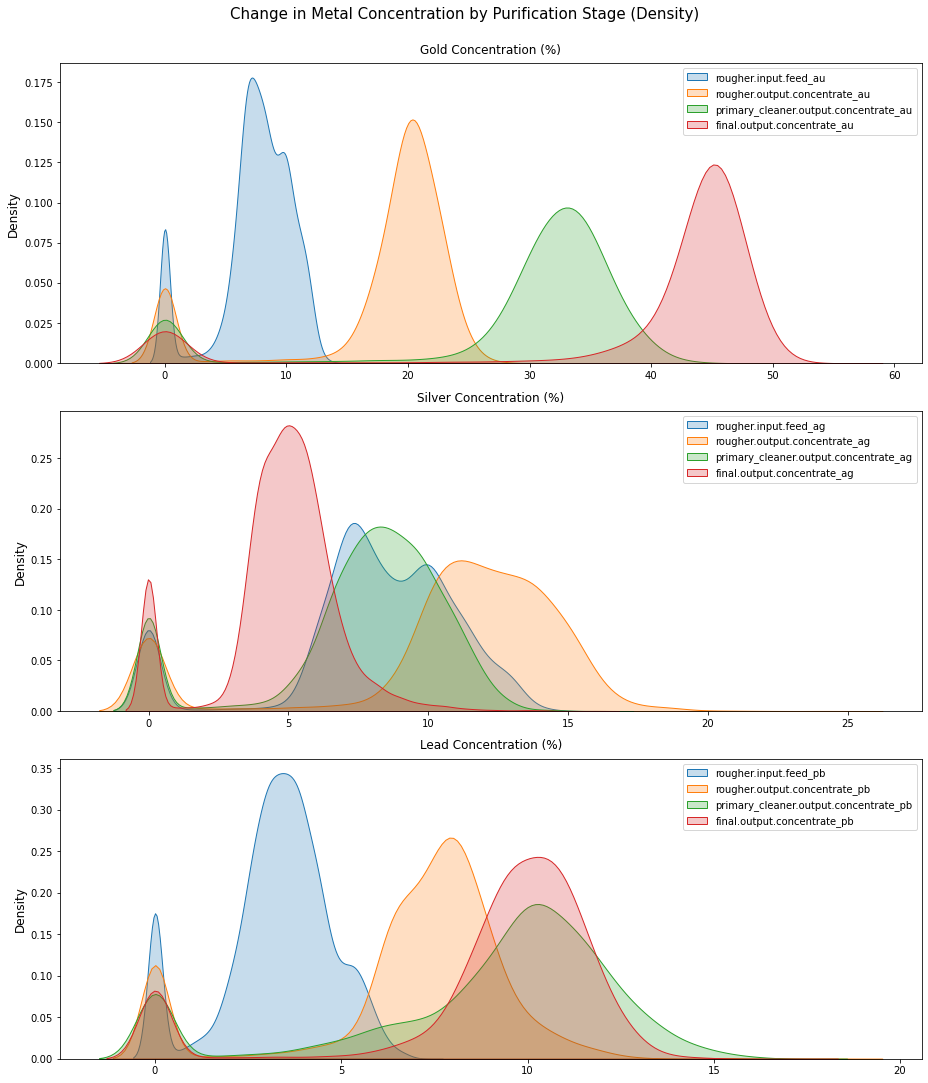

In [23]:
# Creating a list with variables of the concentration of the different metals in each step
conce = ["rougher.input.feed", "rougher.output.concentrate", 
         "primary_cleaner.output.concentrate", "final.output.concentrate"]

# Creating a dictionary with each metal's unique identifier and its name
metals = {'_au' : 'Gold', '_ag' : 'Silver', '_pb' : 'Lead'}

# Building subplots for each metal's concentration distribution after each step of purification
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 15), sharey=False)
fig.suptitle('Change in Metal Concentration by Purification Stage (Density)', fontsize=15, y=1)

for x in metals.keys():
    for c in conce:
        ax = list(metals.keys()).index(x)
        sns.kdeplot(gold_full[(c+x)], ax=axes[ax], shade='fill', label=(c+x))
        axes[ax].legend()
        axes[ax].set_xlabel(metals[x] + ' Concentration (%)', fontsize=12, labelpad = 10)
        axes[ax].xaxis.set_label_position('top')
        axes[ax].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

The subplots above provide us with the three metals the following findings:

1. **Gold** - The concentration of gold increases with every cleaning step that the metal goes. It is exactly what we want.


2. **Silver** - Here we see strange findings. The silver concentration increases until the second stage of the purification process and then is start to decrease. The final concentration of silver is lower than the initial concentration.


3. **Lead** - Here we see that the concentration of the lead metal, is increased until the third step of the purification process, and then stops. The final concentration is roughly equal to the final concentration.

**2.2 Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.**

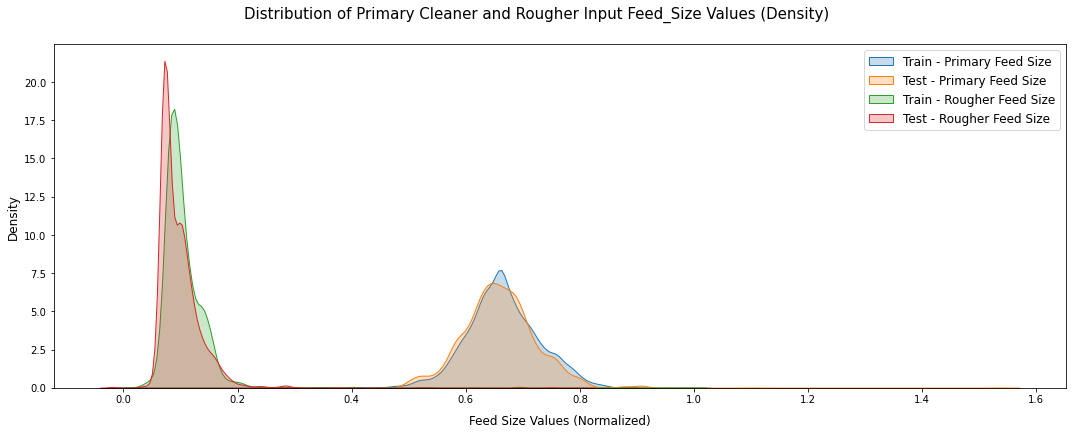

In [24]:
# Building a plot to compare the key feed_size value distributions for training and testing datasets
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Distribution of Primary Cleaner and Rougher Input Feed_Size Values (Density)', fontsize=15, y=1)

sns.kdeplot(gold_train_scaled['primary_cleaner.input.feed_size'], fill=True, label='Train - Primary Feed Size')
sns.kdeplot(gold_test_scaled['primary_cleaner.input.feed_size'], fill=True, label='Test - Primary Feed Size')
sns.kdeplot(gold_train_scaled['rougher.input.feed_size'], fill=True, label='Train - Rougher Feed Size')
sns.kdeplot(gold_test_scaled['rougher.input.feed_size'], fill=True, label='Test - Rougher Feed Size')
plt.legend(fontsize=12)
plt.xlabel('Feed Size Values (Normalized)', fontsize=12, labelpad = 10)
plt.ylabel('Density', fontsize=12)
    
plt.tight_layout()
plt.show()

Here we see that the distributions of the features **'primary_cleaner.input.feed_size'** and **'rougher.input.feed_size'** in both datasets are the same. This is an excellent result, because different distributions may have a negative affect on our model training and testing.

It's worth noting that the values that we see here are not the actual values, but rather the scaled values that we obtained after normalizing the data in earlier steps. 

**2.3 Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.**

In [25]:
# Building a function to calculate the total concentration of all metals in different purification stages
def total_metal_concen(data, stage):
    metal_keys = list(metals.keys())
    total_concen = data[stage + metal_keys[0]] + data[stage + metal_keys[1]] + data[stage + metal_keys[2]]
    return total_concen

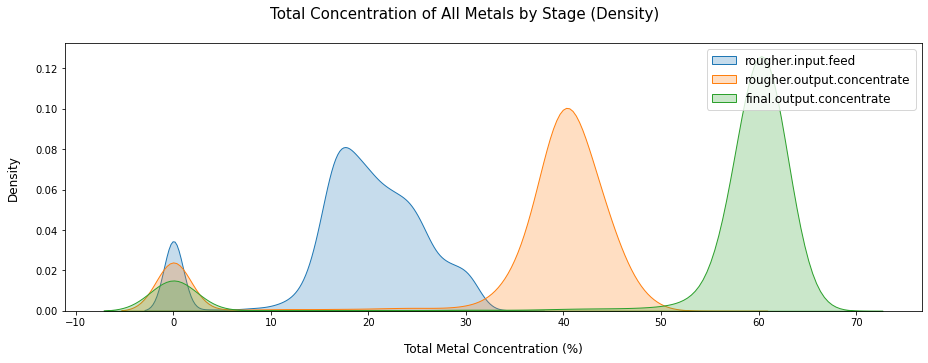

In [26]:
# Building a plot to visualize the total concentration of all metals in different stages.
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density)', fontsize=15, y=1)

sns.kdeplot(total_metal_concen(gold_full, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(total_metal_concen(gold_full, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(total_metal_concen(gold_full, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

We see in the graph that in each step in the purification process, the metals concentration increases  - that is exactly what we expect and want. Nevertheless, we see there are outliers which are represented by the values grouped around 0. In order to ensure that our model training a testing process won't be harmed by these outliers, we will remove them. It is seen pretty clearly in the graph that the cutoff for the outliers will be around the value 10. **But**, we need to remember that our values in the training and testing datasets were normalized, so we can't just filter those values by selecting the rows that have a total concentration greater than 10. The solution will be using the index approach: we will filter the values that are greater than 10 in the full dataset, and then remove the relevant rows in the 2 datasets with the **'date indexer**.

**Outliers removal from the full dataset**

In [27]:
# Removing the rows that the total metal concentaration in less than 10
gold_full_clean = gold_full.loc[(gold_full[['rougher.input.feed_au', 'rougher.input.feed_pb',
                                            'rougher.input.feed_ag']].sum(axis=1) > 10) 
                        & (gold_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 
                                                 'rougher.output.concentrate_ag']].sum(axis=1) > 10) 
                                  & (gold_full[['final.output.concentrate_au', 'final.output.concentrate_pb', 
                                                'final.output.concentrate_ag']].sum(axis=1) > 10)]

Now let's plot another graph to check the removal of the outliers was done correctly.

**Plotting distribution without outliers** 

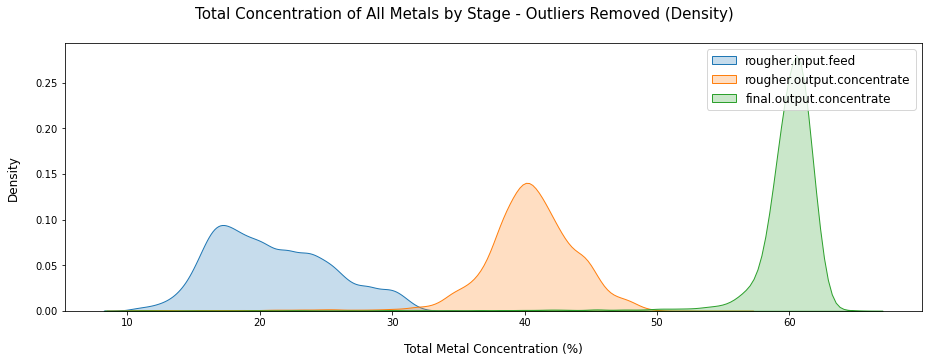

In [28]:
# Plotting new distribution graph of total metals concentration without outliers
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage - Outliers Removed (Density)', fontsize=15, y=1)

sns.kdeplot(total_metal_concen(gold_full_clean, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(total_metal_concen(gold_full_clean, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(total_metal_concen(gold_full_clean, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

The outliers removal was done successfully. We see that there are no values that distribute around the value zero. Now we will use the filtered dataset that doesn't contain outliers which we created earlier, to filter the relevant rows in the training and test datasets. We will ensure that only the rows that are present in the full dataset, will appear in the 2 other datasets. We will do this by removing all the rows in the train and test datasets, where the value in the column **'date'** doesn't present in the full dataset. 

**Outlier removal from the scaled train and test datasets**

In [29]:
len_before = [len(gold_train_scaled), len(gold_test_scaled)]

# Outliers removal from the scaled train and test datasets
gold_train_scaled = gold_train_scaled.loc[gold_train_scaled['date'].isin(gold_full_clean['date'])].reset_index(drop = True)
gold_test_scaled = gold_test_scaled.loc[gold_test_scaled['date'].isin(gold_full_clean['date'])].reset_index(drop = True)

# Checking how much data we removed - in percentages                                
display(pd.DataFrame([[len_before[0], len(gold_train_scaled), round((100 - (len(gold_train_scaled) / len_before[0]) * 100), 2)], 
                      [len_before[1], len(gold_test_scaled), round((100 - (len(gold_test_scaled) / len_before[1]) * 100), 2)]], 
                    columns = ['Initial_rows_num', 'New_rows_num', 'Difference (%)'], index=['Gold Train', 'Gold Test']))
                                        

,Initial_rows_num,New_rows_num,Difference (%)
Gold Train,14149,13650,3.53
Gold Test,5290,5133,2.97


Great!

We didn't lose much data, less than 4%. 

## 3. Build the model

**3.1 Write a function to calculate the final sMAPE value.**

In [30]:
# Building function to calculate sMAPE
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100
    return smape

# Building function to calculate final sMAPE
def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

**Setting the target and features variables for the training and test datasets**

In [31]:
#Get list of feature and training columns.
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [x for x in gold_train_scaled if x not in targets and x != 'date']

#Split training and testing datasets by features and targets.
target_train, target_test = gold_train_scaled[targets].values, gold_test_scaled[targets].values
features_train, features_test = gold_train_scaled[features].values, gold_test_scaled[features].values

**3.2 Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.**

In [32]:
#Create scorer for GridSearchCV.
smape = make_scorer(f_smape, greater_is_better=False)

#Create function to train and fit models using GridSearchCV
def train_fit_score(model, params, name):
    model = GridSearchCV(model, param_grid=params, cv=5, scoring=smape, verbose=0, refit=True)
    model.fit(features_train, target_train)
    return pd.DataFrame([[name, abs(model.best_score_), model.best_params_]], columns=['Estimator', 'Best Score', 'Best Params'])

In [33]:
#Create Decision Tree Regressor
DecisionTree = train_fit_score(DecisionTreeRegressor(random_state=12345), \
                      {'max_depth': range(5, 10, 5), \
                       'min_impurity_decrease' : np.arange(.01, .20, .02), \
                       'min_samples_split' : range(1, 10, 2)}, 'Decision Tree')

#Create Linear Regressor
LinearRegressor = train_fit_score(LinearRegression(), {}, 'Linear Regressor')

#Create Lasso Regressor
LassoRegressor = train_fit_score(Lasso(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)}, 'Lasso Regressor')

#Create KNeighbors Regressor
KNNeighbors = train_fit_score(KNeighborsRegressor(), 
                        {'n_neighbors' : range(2, 10, 1),
                         'weights' : ['uniform', 'distance']}, 'KNeighbors Regressor')

#Create Random Forest Regressor
RandomForest = train_fit_score(RandomForestRegressor(random_state=12345), 
                       {'n_estimators' : range(10, 85, 25),
                        'max_depth' : range(5, 45, 10),
                        'min_impurity_decrease' : np.arange(.05, .25, .1)}, 'Random Forest')

In [34]:
#Showing the best scores from all regressors
scores = pd.concat([DecisionTree, LinearRegressor, LassoRegressor, KNNeighbors, RandomForest]).set_index('Estimator')
scores['Best Score'] = scores['Best Score'].round(2)
display(scores.drop('Best Params', axis=1))

,Best Score
Estimator,
Decision Tree,9.18
Linear Regressor,10.01
Lasso Regressor,8.51
KNeighbors Regressor,9.74
Random Forest,8.96


We can see from the output that the **Lasso Regressor has the lowest average sMAPE score 0f 8.51**, which means that it has the best performance of the 5 tested models. Now we will test this model on the test dataset and see how it performs.

**Model Testing**

In [35]:
# Setting the best model - Lasso Regressor
Lasso = Lasso(**scores['Best Params'][2])

# Fitting the model to the training dataset
Lasso = Lasso.fit(features_train, target_train)

# Calculating the final sMAPE for the test dataset
Lasso_smape = round(f_smape(target_test, Lasso.predict(features_test)), 2)

# Printing the results
print('Final sMAPE score of the Lasso Regressor for the test dataset:', Lasso_smape)

Final sMAPE score of the Lasso Regressor for the test dataset: 6.28


The result of the final sMAPE score that was obtained on the test dataset, is **better than the one we obtained for the test dataset** - this is an excellent outcome. **But**, we cannot really know if it's good results or not, without checking it against sMAPE score of a naive forecasting model. So, in the next section, we will build a 'dummy' model that will change the target values to the average value of each target.  

**Sanity Check Model**

In [36]:
# Creating an array with the average value of each target
dummy_pred = np.tile(np.mean(target_train, axis=0), (len(target_test), 1))

# Calculating the final sMAPE score for the dummy model using the test dataset
smape_dummy = f_smape(target_test, dummy_pred)

# Printing the results
print('Final sMALE score for the dummy model on the test dataset:', smape_dummy)

Final sMALE score for the dummy model on the test dataset: 7.538551031809307


Here the final sMAPE score for the dummy model is a little bit higher than the score we obtained for the Lasso Regressor. Although the difference is small, that shows that our Lasso Regressor is going in the right direction. 

## Conclusion

Our best model, AKA Lasso Regressor, didn't manage to obtain sMAPE score far below our 'dummy' model. As so, along with the understanding of the company's interest to tune their purification process to obtain the maximum amount of gold out of the ore, we would recommend to those who organized the data and understand the gold-extraction process, to check again the features in the full_gold dataset and consider to reorganize them by importance. Also, after selecting the most important features we would recommend collecting more data and then train and test the models again. Maybe with weighted features, we will obtain better results with sMAPE score that will be significantly lower than our sMAPE score of the sanity check. 